### MNIST dataset classification using NN TensorFlow

In [2]:
#Feel free to add any other module needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
print("Shape of training images set: {}".format(training_images.shape))
print("Shape of training labels set: {}".format(training_labels.shape))
print("Shape of test images set: {}".format(test_images.shape))
print("Shape of test labels set: {}".format(test_labels.shape))

Shape of training images set: (60000, 28, 28)
Shape of training labels set: (60000,)
Shape of test images set: (10000, 28, 28)
Shape of test labels set: (10000,)


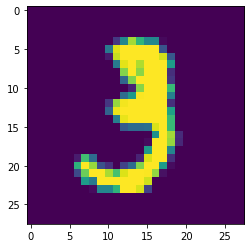

In [12]:
### Visualize samples of  images using matplotlib ###

#display(training_images)
%matplotlib inline
plt.imshow(training_images[10])

In [34]:
#Grouping all data in 4D ARRAY 
training_images = training_images.reshape(training_images.shape[0], 28, 28, 1)
print("Shape of training images set: {}".format(training_images.shape))

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
print("Shape of test images set: {}".format(test_images.shape))

print("Training images type:{} ".format(training_images.dtype))
print("Test images type: {} ".format(test_images.dtype))

test_images = test_images.astype('float32')
print("Test images type: {} ".format(test_images.dtype))

Shape of training images set: (60000, 28, 28, 1)
Shape of test images set: (10000, 28, 28, 1)
Training images type:float32 
Test images type: float32 
Test images type: float32 


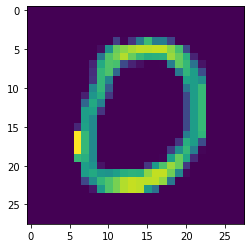

In [39]:
### Normalize images ###
training_images = tf.keras.utils.normalize(training_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)

plt.imshow(training_images[10])
plt.imshow(test_images[10])

In [41]:
### Create , compile and run model ###
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2641 - accuracy: 0.9217
Epoch 2/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1089 - accuracy: 0.9666
Epoch 3/3
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0750 - accuracy: 0.9765


In [45]:
### Evaluate model ###
val_loss, val_accuracy = model.evaluate(test_images, test_labels)
print("Validation loss: {}".format(val_loss))
print("Validation accuracy: {}".format(val_accuracy))

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0954 - accuracy: 0.9709
Validation loss: 0.09544917915351689
Validation accuracy: 0.9708999991416931


In [47]:
### Do prediction on a single sample from test set ###
model.save('mnist_nn.model')
number_reader = tf.keras.models.load_model('mnist_nn.model')
prediction = number_reader.predict(test_images)

INFO:tensorflow:Assets written to: mnist_nn.model\assets


In [48]:
print(prediction[0])

[4.8469087e-09 2.1479902e-09 1.9899832e-07 2.7437202e-06 8.1017276e-10
 1.9784034e-08 3.2546604e-14 9.9999559e-01 1.5548256e-08 1.4419777e-06]


In [50]:
print(np.argmax(prediction[0]))

7


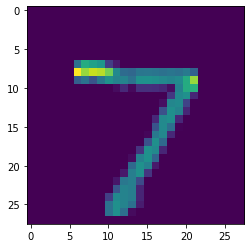

In [51]:
plt.imshow(test_images[0])